# Telecom Churn Case Study

 Customers are able to choose from multiple service providers and actively switch from one operator to another. Industry experiences average of 15-25% annual churn rate. It costs 5-10 times more to acquire a new customer than to retain an existing one.

#### Problem Statement: 
To predict which high - value customers are at high risk of churn 
based on usage 
and recommend strategies to manage this churn

  - To identify customers at high risk of churn.
  - To identify high-value customers among them.
  - To identify the main indicators of churn.

#### Types of churn:
    - Revenue based churn: Customers who have not utilised any revenue-generating facilities.
    - Usage based churn: Customers who have not done any usage.

#### Factors in consideration: 

    - This project is based on the Indian and Southeast Asian market. 
    - Stress is more on pre-paid customers.
    - Use the usage-based definition to define churn.
    - Approx. 80% of revenue comes from the top 20% customers.

#### Phases of customer lifecycle :
    - Months 6 and 7: The ‘good’ phase: Customer is happy.
    - Month 8: The ‘action’ phase: Customer experience starts to sore in.
        In this phase, the customer usually shows different behaviour than the ‘good’ months. 
        Also, it is crucial to identify high-churn-risk customers in this phase.
    - Month 9: The ‘churn’ phase: Customer is said to have churned.

#### Data Preparation Steps:
    1. Derive new features
    
    2. Filter high-value customers: 
    Those who have recharged with an amount more than or equal to X, 
    where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
    
    3. Tag churners and remove attributes of the churn phase: 
    Remove all the attributes corresponding to the churn phase 
    (all attributes having ‘ _9’, etc. in their names)

#### Purpose of models:
    - To predict whether a high-value customer will churn or not.
    - To identify important variables that are strong predictors of churn. 

#### Notes:
1. You should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model.
2. Try using techniques to handle class imbalance. 

#### Suggestive steps to build the model to predict customers who will churn:
    - Preprocess data
    - Conduct EDA
    - Derive new features
    - Reduce the number of variables using PCA.
    - Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).
    - Evaluate the models using appropriate evaluation metrics.
    Note that is is more important to identify churners than the non-churners accurately - 
    choose an appropriate evaluation metric which reflects this business goal.
    - Finally, choose a model based on some evaluation metric.

#### To build model to identify important predictor attributes which help the business understand indicators of churn
    - Use a model from the tree family OR logistic regression model [make sure to handle multi-collinearity]
    - Display them visually

-------------------------------------------------------------------------------------------------

## Data understanding, preparation, and feature engineering

#### Required Libraries

In [123]:
#import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_curve, classification_report
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

from IPython.display import Markdown

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:20,.2f}'.format
sns.set(style="whitegrid")

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data

path = "Data\\"
telecom = pd.read_csv(path+"telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,na

In [3]:
telecom.shape

(99999, 226)

In [4]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,"99,999.00","99,999.00","98,981.00","98,981.00","98,981.00","99,999.00","99,999.00","99,999.00","99,999.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00",

In [5]:
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

### Data Preparation

#### Inconsistent / missing data handling

In [6]:
#Defining utility APIs to be used for different dataframe operations

def color_red(value):
    color = 'red' if value > 5 else 'black'
    return 'color: %s' % color

def checknull(dataframe):
    df_null = 100*dataframe.isnull().sum()/len(dataframe)
    df = pd.DataFrame(df_null)
    df.rename(columns={0:'Null_Percentage'}, inplace=True)
    df = pd.DataFrame(df.Null_Percentage).style.applymap(color_red)
    display(df)

def checknull_specificAttributes(dataframe, column_list):
    df_null = 100*dataframe.loc[:,column_list].isnull().sum()/len(dataframe)
    df = pd.DataFrame(df_null)
    df.rename(columns={0:'Null_Percentage'}, inplace=True)
    df = pd.DataFrame(df.Null_Percentage).style.applymap(color_red)
    display(df)

def printUniqueValuesForSpecificColumns(dataframe, column_list):
    print(dataframe[column_list].nunique(dropna=False).sort_values(ascending=True).head(len(column_list)))

def printUniqueValuesForColumns(dataframe, n):
    print(dataframe.nunique(dropna=False).sort_values(ascending=True).head(n))

def print_n_MissingValueCounts(dataframe, n):  
    print(dataframe.isnull().sum().nlargest(n))

In [7]:
#Defining utility APIs to be used for plotting

def plotMonthlyTrend(dataframe, attribute):
    plt.figure(figsize=(15, 20))
    plt.subplot(2, 3, 1)
    sns.boxplot(data=dataframe, x = "churn", y = attribute+"_6", hue = "churn", showfliers = False)
    plt.subplot(2, 3, 2)
    sns.boxplot(data = dataframe, x = "churn", y = attribute + "_7", hue = "churn", showfliers = False)
    plt.subplot(2, 3, 3)
    sns.boxplot(data = dataframe, x = "churn", y = attribute + "_8", hue = "churn", showfliers = False)
    plt.show()

def pltHistogram(dataset,col):
    fig, ax = plt.subplots(figsize=(20,5))
    counts, bins, patches = ax.hist(dataset[col],bins=range(0,dataset[col].max(),round(365)),edgecolor='white')    
    ax.set_xticks(bins)
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for count, x in zip(counts, bin_centers):        
        percent = '%0.0f%%' % (100 * float(count) / counts.sum())
        ax.annotate(percent, xy=(x,0.2), xycoords=('data', 'axes fraction'),
        xytext=(0,-30), textcoords='offset points'
                    , va='top', ha='center'
                   )
    ax.set_xlabel(col.upper())
    ax.set_ylabel('Count')
    plt.show()

#### Renaming columns with month number as per convention

In [8]:
telecom.rename(columns={'jun_vbc_3g' : 'vbc_3g_6',
                    'jul_vbc_3g' : 'vbc_3g_7',
                    'aug_vbc_3g' : 'vbc_3g_8',
                    'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

In [9]:
#Creating new features for volume of data used monthly

for i in range(6,10):
    telecom['vol_data_'+str(i)] = (telecom['vol_2g_mb_'+str(i)]+telecom['vol_3g_mb_'+str(i)]).astype(int)

In [10]:
col_list = telecom.filter( regex='(_6$|_7$|_8$|_9$)', axis=1)
col_list = np.unique(list(map(lambda i: i[ : -2], col_list)))
print(col_list)

['arpu' 'arpu_2g' 'arpu_3g' 'av_rech_amt_data' 'count_rech_2g'
 'count_rech_3g' 'date_of_last_rech' 'date_of_last_rech_data' 'fb_user'
 'ic_others' 'isd_ic_mou' 'isd_og_mou' 'last_date_of_month'
 'last_day_rch_amt' 'loc_ic_mou' 'loc_ic_t2f_mou' 'loc_ic_t2m_mou'
 'loc_ic_t2t_mou' 'loc_og_mou' 'loc_og_t2c_mou' 'loc_og_t2f_mou'
 'loc_og_t2m_mou' 'loc_og_t2t_mou' 'max_rech_amt' 'max_rech_data'
 'monthly_2g' 'monthly_3g' 'night_pck_user' 'offnet_mou' 'og_others'
 'onnet_mou' 'roam_ic_mou' 'roam_og_mou' 'sachet_2g' 'sachet_3g'
 'spl_ic_mou' 'spl_og_mou' 'std_ic_mou' 'std_ic_t2f_mou' 'std_ic_t2m_mou'
 'std_ic_t2o_mou' 'std_ic_t2t_mou' 'std_og_mou' 'std_og_t2c_mou'
 'std_og_t2f_mou' 'std_og_t2m_mou' 'std_og_t2t_mou' 'total_ic_mou'
 'total_og_mou' 'total_rech_amt' 'total_rech_data' 'total_rech_num'
 'vbc_3g' 'vol_2g_mb' 'vol_3g_mb' 'vol_data']


`Month based column names`

In [11]:
month_cols = telecom.filter( regex='(_6$|_7$|_8$|_9$)', axis=1).columns
month_cols

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9',
       'onnet_mou_6', 'onnet_mou_7',
       ...
       'fb_user_8', 'fb_user_9', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6',
       'vbc_3g_9', 'vol_data_6', 'vol_data_7', 'vol_data_8', 'vol_data_9'],
      dtype='object', length=224)

In [12]:
checknull(telecom)

,Null_Percentage
mobile_number,0.000000
circle_id,0.000000
loc_og_t2o_mou,1.018010
std_og_t2o_mou,1.018010
loc_ic_t2o_mou,1.018010
last_date_of_month_6,0.000000
last_date_of_month_7,0.601006
last_date_of_month_8,1.100011
last_date_of_month_9,1.659017
arpu_6,0.000000


#### Columns with Null value for recharge and minutes of usage columns. We can assume no data means no recharge was done and no calls took place. We can replace these with 0.

In [13]:
rech_mou_cols = telecom.filter(regex='(.rech.|.mou.)',axis=1).columns
print(rech_mou_cols)

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7',
       ...
       'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6',
       'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object', length=156)


In [14]:
telecom[rech_mou_cols] = telecom[rech_mou_cols].fillna(0)
print_n_MissingValueCounts(telecom, 25)

arpu_3g_6               74846
arpu_2g_6               74846
night_pck_user_6        74846
fb_user_6               74846
arpu_3g_7               74428
arpu_2g_7               74428
night_pck_user_7        74428
fb_user_7               74428
arpu_3g_9               74077
arpu_2g_9               74077
night_pck_user_9        74077
fb_user_9               74077
arpu_3g_8               73660
arpu_2g_8               73660
night_pck_user_8        73660
fb_user_8               73660
og_others_9              7745
ic_others_9              7745
og_others_8              5378
ic_others_8              5378
og_others_6              3937
ic_others_6              3937
og_others_7              3859
ic_others_7              3859
last_date_of_month_9     1659
dtype: int64


In [15]:
printUniqueValuesForColumns(telecom, 20)

std_ic_t2o_mou_7        1
std_og_t2c_mou_8        1
std_og_t2c_mou_9        1
std_ic_t2o_mou_6        1
std_og_t2c_mou_7        1
std_ic_t2o_mou_9        1
std_ic_t2o_mou_8        1
std_og_t2c_mou_6        1
last_date_of_month_6    1
circle_id               1
last_date_of_month_9    2
last_date_of_month_7    2
loc_og_t2o_mou          2
std_og_t2o_mou          2
last_date_of_month_8    2
loc_ic_t2o_mou          2
night_pck_user_7        3
night_pck_user_8        3
night_pck_user_9        3
night_pck_user_6        3
dtype: int64


#### We see that some columns have only a single value. We can drop these as they are not adding any value to our analysis or in model building.

In [16]:
telecom = telecom.drop(['std_ic_t2o_mou_6','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_9','std_ic_t2o_mou_8','std_og_t2c_mou_7',
'std_ic_t2o_mou_7','std_og_t2c_mou_6','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'], axis=1)

In [17]:
printUniqueValuesForColumns(telecom, 20)

last_date_of_month_6     1
last_date_of_month_7     2
last_date_of_month_8     2
last_date_of_month_9     2
fb_user_6                3
night_pck_user_9         3
fb_user_9                3
fb_user_8                3
fb_user_7                3
night_pck_user_8         3
night_pck_user_7         3
night_pck_user_6         3
monthly_2g_9             5
monthly_2g_6             5
monthly_2g_7             6
monthly_2g_8             6
monthly_3g_9            11
monthly_3g_6            12
monthly_3g_8            12
monthly_3g_7            15
dtype: int64


#### We have two categorical entities for all the months: `fb_user` and `night pack user`. Let's take a look at the values

In [21]:
print(telecom["night_pck_user_6"].unique())
print(telecom["fb_user_6"].unique())

[0. 1.]
[1. 0.]


#### We can assign nan as 0 here as well, signifying that the customer is not using the service. 

In [19]:
col_list = telecom.filter( regex='(^fb_user_|^night_pck_user_)', axis=1).columns
telecom[col_list] = telecom[col_list].fillna(0)
print_n_MissingValueCounts(telecom, 25)

arpu_3g_6               74846
arpu_2g_6               74846
arpu_3g_7               74428
arpu_2g_7               74428
arpu_3g_9               74077
arpu_2g_9               74077
arpu_3g_8               73660
arpu_2g_8               73660
og_others_9              7745
ic_others_9              7745
og_others_8              5378
ic_others_8              5378
og_others_6              3937
ic_others_6              3937
og_others_7              3859
ic_others_7              3859
last_date_of_month_9     1659
last_date_of_month_8     1100
last_date_of_month_7      601
mobile_number               0
last_date_of_month_6        0
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
dtype: int64


In [22]:
#incoming related columns

telecom.filter(regex='ic', axis =1).columns

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_9',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'loc_ic_mou_9',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2f_mou_9',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'std_ic_mou_9',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'spl_ic_mou_9',
       'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'isd_ic_mou_9',
       'ic_others_6', 'ic_

##### We see that all columns with incoming and outgoing specify minutes of usage. Hence, others should also specify the same. Hence, we can assume that null values for mou columns actually mean 0 minutes.

In [23]:
ic_og_others = telecom.filter(regex='(ic.others|og.others)', axis =1).columns
print(ic_og_others)

Index(['og_others_6', 'og_others_7', 'og_others_8', 'og_others_9',
       'ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9'],
      dtype='object')


In [24]:
telecom.rename(columns = {'og_others_6':'mou_og_others_6', 
                      'og_others_7':'mou_og_others_7',
                      'og_others_8':'mou_og_others_8',
                      'og_others_9':'mou_og_others_9',
                      'ic_others_6':'mou_ic_others_6',
                      'ic_others_7':'mou_ic_others_7',
                      'ic_others_8':'mou_ic_others_8',
                      'ic_others_9':'mou_ic_others_9'
                     }, inplace = True) 

In [25]:
mou_cols = telecom.filter(regex='mou', axis =1).columns
print(mou_cols)

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7',
       ...
       'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_ic_mou_9', 'mou_ic_others_6', 'mou_ic_others_7',
       'mou_ic_others_8', 'mou_ic_others_9'],
      dtype='object', length=116)


In [26]:
io_list = telecom.filter(regex='(mou_ic.others|mou_og.others)', axis =1).columns
telecom[io_list] = telecom[io_list].fillna(0)
print_n_MissingValueCounts(telecom, 15)

arpu_3g_6               74846
arpu_2g_6               74846
arpu_3g_7               74428
arpu_2g_7               74428
arpu_3g_9               74077
arpu_2g_9               74077
arpu_3g_8               73660
arpu_2g_8               73660
last_date_of_month_9     1659
last_date_of_month_8     1100
last_date_of_month_7      601
mobile_number               0
last_date_of_month_6        0
arpu_6                      0
arpu_7                      0
dtype: int64


#### Let us now take a closer look at `arpu` related columns

#### `ARPU` refers to average revenue per user, as per the data dictionary. So, if the value is null, we may take the revenue as 0.

In [27]:
arpu_cols = telecom.filter(regex='arpu', axis =1).columns
print(arpu_cols)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9'],
      dtype='object')


In [28]:
telecom[arpu_cols] = telecom[arpu_cols].fillna(0)
print_n_MissingValueCounts(telecom, 10)

last_date_of_month_9    1659
last_date_of_month_8    1100
last_date_of_month_7     601
mobile_number              0
last_date_of_month_6       0
arpu_6                     0
arpu_7                     0
arpu_8                     0
arpu_9                     0
onnet_mou_6                0
dtype: int64


In [29]:
print(telecom.last_date_of_month_6.nunique())
print(telecom.last_date_of_month_7.nunique())
print(telecom.last_date_of_month_8.nunique())

1
1
1


#### We can drop column `last date of month_7` `last date of month_8` and `last date of month_9` since there are many missing values and the columns contain a single unique value

In [30]:
telecom = telecom.drop(["last_date_of_month_6",'last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'], axis=1)

In [31]:
checknull(telecom)

,Null_Percentage
mobile_number,0.000000
arpu_6,0.000000
arpu_7,0.000000
arpu_8,0.000000
arpu_9,0.000000
onnet_mou_6,0.000000
onnet_mou_7,0.000000
onnet_mou_8,0.000000
onnet_mou_9,0.000000
offnet_mou_6,0.000000


##### The missing values have been handled now all columns. We will now categorize the columns.

In [32]:
list(telecom.columns)

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_

##### From the columns, we are getting three categories of data from a high-level overview:
- Fixed attributes: Circle_id, Mobile_number, AON, ARPU, VBC, etc.
- Services: FB, Sachet, Nightpack, Roaming, Data, etc.
- Usage: MOU, Recharge, Amount, Internet Volumne, etc.

##### We have both categorical as well as numeric features within these three categories

In [33]:
printUniqueValuesForColumns(telecom, 25)

fb_user_7               2
fb_user_9               2
night_pck_user_6        2
night_pck_user_8        2
night_pck_user_9        2
night_pck_user_7        2
fb_user_6               2
fb_user_8               2
monthly_2g_6            5
monthly_2g_9            5
monthly_2g_8            6
monthly_2g_7            6
monthly_3g_9           11
monthly_3g_8           12
monthly_3g_6           12
monthly_3g_7           15
count_rech_3g_6        25
sachet_3g_6            25
sachet_3g_9            27
sachet_3g_7            27
count_rech_3g_9        27
count_rech_3g_7        28
sachet_3g_8            29
count_rech_3g_8        29
date_of_last_rech_9    31
dtype: int64


In [34]:
telecom.shape

(99999, 214)

#### Derived features

In [35]:
#To get month-based average recharge amuont:
for i in range(6,10):
    telecom['avg_rech_amt_'+str(i)] = round(telecom['total_rech_amt_'+str(i)]/telecom['total_rech_num_'+str(i)]+1,2)

In [36]:
#To get number of times a customer recharged month-wise:
for i in range(6,10):
    telecom['rech_frequency_data_'+str(i)] = (telecom['count_rech_2g_'+str(i)]+telecom['count_rech_3g_'+str(i)]).astype(int)

In [37]:
#To get total amount of recharge month-wise:
for i in range(6,10):
    telecom['tot_rech_amt_data_'+str(i)] = telecom['rech_frequency_data_'+str(i)]*telecom['avg_rech_amt_'+str(i)]

In [38]:
#To get total month-wise recharge amount:
for i in range(6,10):
    telecom['tot_mon_rech_'+str(i)] = telecom['total_rech_amt_'+str(i)]+telecom['tot_rech_amt_data_'+str(i)]

In [39]:
#To get total month-wise mou :
for i in range(6,10):
    telecom['tot_mou_'+str(i)] = telecom['total_ic_mou_'+str(i)]+telecom['total_og_mou_'+str(i)]

In [40]:
derived_feat_list = telecom.filter(regex='(tot_rech|tot_mon|tot_mou|avg|rech_frequency)', axis =1).columns
print(telecom[derived_feat_list].columns)

Index(['avg_rech_amt_6', 'avg_rech_amt_7', 'avg_rech_amt_8', 'avg_rech_amt_9',
       'rech_frequency_data_6', 'rech_frequency_data_7',
       'rech_frequency_data_8', 'rech_frequency_data_9', 'tot_rech_amt_data_6',
       'tot_rech_amt_data_7', 'tot_rech_amt_data_8', 'tot_rech_amt_data_9',
       'tot_mon_rech_6', 'tot_mon_rech_7', 'tot_mon_rech_8', 'tot_mon_rech_9',
       'tot_mou_6', 'tot_mou_7', 'tot_mou_8', 'tot_mou_9'],
      dtype='object')


In [41]:
#Check for missing values before proceeding

checknull_specificAttributes(telecom, derived_feat_list)

,Null_Percentage
avg_rech_amt_6,1.607016
avg_rech_amt_7,1.767018
avg_rech_amt_8,3.622036
avg_rech_amt_9,4.760048
rech_frequency_data_6,0.000000
rech_frequency_data_7,0.000000
rech_frequency_data_8,0.000000
rech_frequency_data_9,0.000000
tot_rech_amt_data_6,1.607016
tot_rech_amt_data_7,1.767018


#### There are some null entries for customers who have not done recharges and hence their total and average monthly recharge amount is unavailable. We can simply replace them with 0

In [42]:
telecom[derived_feat_list] = telecom[derived_feat_list].fillna(0)
checknull_specificAttributes(telecom, derived_feat_list)

,Null_Percentage
avg_rech_amt_6,0.000000
avg_rech_amt_7,0.000000
avg_rech_amt_8,0.000000
avg_rech_amt_9,0.000000
rech_frequency_data_6,0.000000
rech_frequency_data_7,0.000000
rech_frequency_data_8,0.000000
rech_frequency_data_9,0.000000
tot_rech_amt_data_6,0.000000
tot_rech_amt_data_7,0.000000


#### Fetching high value customers

In [43]:
#Average amount spent by customers in good phase [first 2 months]
avg_spend_goodPhase =(telecom['tot_mon_rech_6'] + telecom['tot_mon_rech_7'])/2
print(avg_spend_goodPhase)
print(type(avg_spend_goodPhase))

0                     395.25
1                     250.84
2                     241.50
3                     270.00
4                     293.10
                ...         
99994                  85.00
99995                 110.00
99996                  84.30
99997                 652.00
99998                 426.50
Length: 99999, dtype: float64
<class 'pandas.core.series.Series'>


In [44]:
#As per the business objective, we choose Threshold as 70th percentile of average recharge amount in good phase

goodPhase_thresh = np.nanpercentile(avg_spend_goodPhase, 70)
print(goodPhase_thresh)

401.0


In [45]:
#Users having good phase average recharge amount >= threshold of 70th percentile

highValue_cust = telecom[avg_spend_goodPhase >= goodPhase_thresh]
highValue_cust.reset_index(inplace=True,drop=True)

#Percentage of high-value customers.
highValue_cust_percentage=round(len(highValue_cust)/telecom.shape[0]*100)

print("There are %d High-Value Customers in the dataset i.e around %d percent of total customer base"% (len(highValue_cust), highValue_cust_percentage))

There are 30008 High-Value Customers in the dataset i.e around 30 percent of total customer base


#### Identifying Churners

##### Churners would be those customers who have not availed any services in the last month, whether it be incoming or outgoing calls or data usage. Also, if they have at least recharged to keep the services going.

In [46]:
#Utility API for identification of churn customers
def churnCust(df, churn_cols):        
    flag = ~df[[s for s in churn_cols]].any(axis=1)
    flag = flag.map({True:1, False:0})
    return flag

In [47]:
churn_list = telecom.filter(regex='_9$', axis =1).columns
print(churn_list)

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'mou_og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'mou_ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9',
       'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9',
       'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9',
       'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9',
       'sachet_2g_9', 'monthly_3g_9', 'sac

In [48]:
#Columns to check: tot_vol_data_9, total_ic_mou_9, total_og_mou_9 and tot_mon_rech_9
churn_cols = ["vol_data_9", "total_ic_mou_9", "total_og_mou_9", "tot_mon_rech_9"]
telecom[churn_cols].fillna(0)

,vol_data_9,total_ic_mou_9,total_og_mou_9,tot_mon_rech_9
0,0,0.00,0.00,0.00
1,0,188.04,72.11,121.00
2,8,517.74,124.94,410.14
3,0,305.38,362.54,410.00
4,0,205.31,104.59,200.00
...,...,...,...,...
99994,0,154.43,27.14,50.00
99995,0,108.84,106.41,30.00
99996,0,0.00,0.00,0.00
99997,4262,2.21,0.00,"1,440.68"


In [49]:
highValue_cust['churn'] = churnCust(highValue_cust, churn_cols)
churnCust_count = len(highValue_cust[highValue_cust.churn == 1])
print("There are {} users flagged as churners out of {} High-Value Customers.".format(churnCust_count,len(highValue_cust)))
print("{}% of High-value Customers Churned in the 9th Month.".format(round(churnCust_count/len(highValue_cust) *100,2)));

There are 2112 users flagged as churners out of 30008 High-Value Customers.
7.04% of High-value Customers Churned in the 9th Month.


#### Since around 93% of customers have not churned. This is a case of class imabalance and we need to handle that later before modelling

In [50]:
highValue_cust.shape

(30008, 235)

##### Deleting columns for churn phase since we do not need it now. Further analysis will be done on non-churned customers.

In [51]:
churn_list = telecom.filter(regex='_9$', axis =1).columns

In [52]:
telecom_final = highValue_cust.drop(churn_list, axis=1)

In [53]:
#We can also remove the date related columns, since we do not need them anymore after getting the churn value

date_cols = telecom_final.filter(regex='date', axis =1).columns
telecom_final = telecom_final.drop(date_cols, axis=1)

In [54]:
telecom_final.shape

(30008, 171)

In [55]:
telecom_final.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'tot_rech_amt_data_6', 'tot_rech_amt_data_7', 'tot_rech_amt_data_8',
       'tot_mon_rech_6', 'tot_mon_rech_7', 'tot_mon_rech_8', 'tot_mou_6',
       'tot_mou_7', 'tot_mou_8', 'churn'],
      dtype='object', length=171)

In [56]:
telecom_final

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,mou_og_others_6,mou_og_others_7,mou_og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,mou_ic_others_6,mou_ic_others_7,mou_ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vol_data_6,vol_data_7,vol_data_8,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,rech_frequency_data_6,rech_frequency_data_7,rech_frequency_data_8,tot_rech_amt_data_6,tot_rech_amt_data_7,tot_rech_amt_data_8,tot_mon_rech_6,tot_mon_rech_7,tot_mon_rech_8,tot_mou_6,tot_mou_7,tot_mou_8,churn
0,7000701601,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,802,57.74,19.38,18.74,0,0,0,317.00,159.00,520.71,0,0,0,0.00,0.00,0.00,"1,580.00",790.00,"3,638.00","1,113.99","1,167.28",778.90,1
1,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0

### Feature Analysis

1. AON

count              30,008.00
mean                1,250.33
std                   970.89
min                   180.00
25%                   476.00
50%                   891.00
75%                 1,877.25
max                 4,321.00
Name: aon, dtype: float64


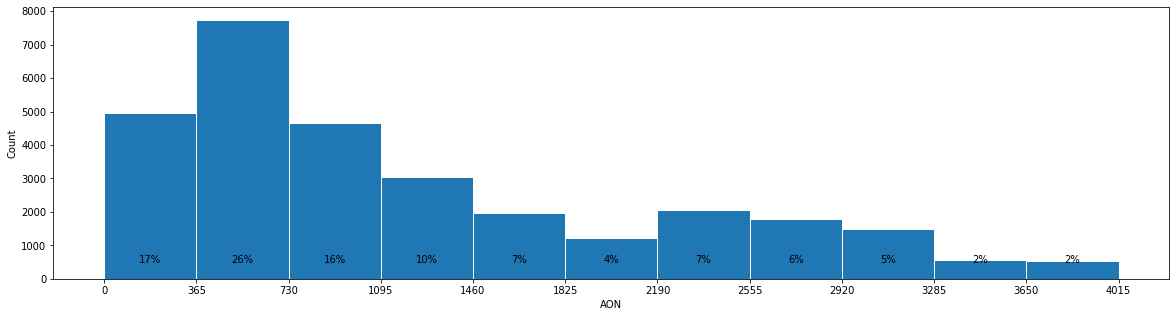

In [57]:
# Customers Distribution on the Age On Network
print(telecom_final.aon.describe())

pltHistogram(telecom_final,'aon')

 - We see that a quarter of the high value customers are in the second year of network usage.
 - We also see that about 68% of these customers have joined the network in last four years.

2. Tenure Analysis

In [156]:
tenure_data = highValue_cust.copy()

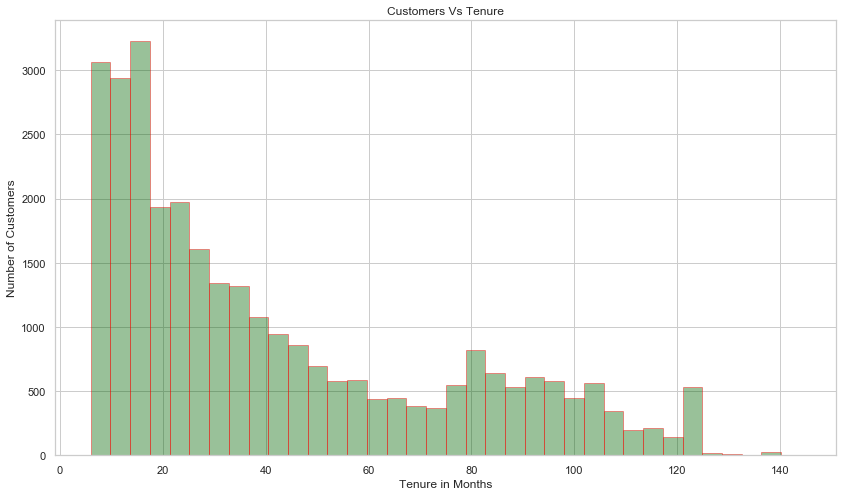

In [157]:
plt.figure(figsize=(14,8))
# aon --> Age on network - number of days the customer is using the operator T network
tenure_data['tenure'] = tenure_data['aon']/30
tenure_data['tenure'].head()
ax = sns.distplot(tenure_data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkgreen', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in Months')
ax.set_title('Customers Vs Tenure')
plt.show()

In [160]:
tenure_range = [0, 6, 12, 24, 60, 61]
tenure_bins = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_data['tenure_range'] = pd.cut(tenure_data['tenure'], tenure_range, labels=tenure_bins)
tenure_data['tenure_range'].head()

0        2-5 Yrs
1    6-12 Months
2        1-2 Yrs
3        1-2 Yrs
4        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

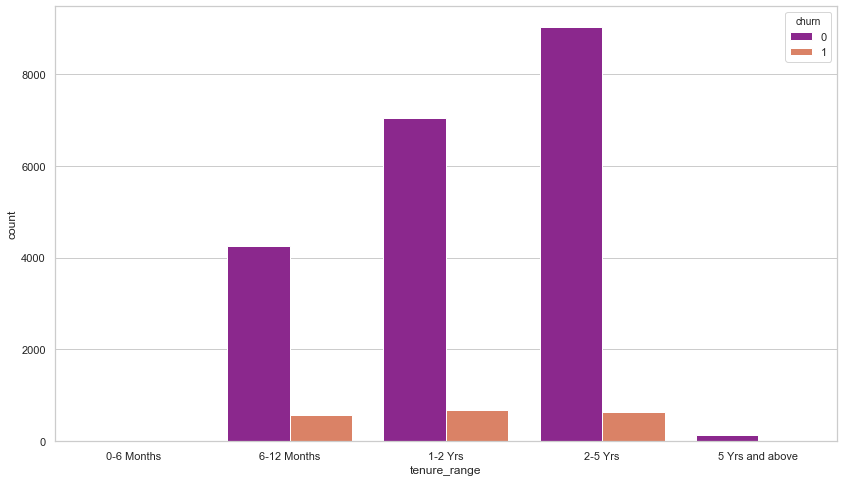

In [161]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure_data,palette=("plasma"))
plt.show()

### Modelling

### PCA: Principal Component Analysis

In [100]:
# Defining utility APIs for modelling

def scale_data(X):
    scaler = StandardScaler()
    X_col = X.columns
    X_scaled = scaler.fit_transform(X)
    X_scale_final = pd.DataFrame(X_scaled, columns=X_col)
    return X_scale_final

def header(string):
    display(Markdown("------ "))
    display(Markdown("### "+string))

def print_model_metrics(y_test,y_pred,model_name):
    header(model_name+" Model Stats Scores Summary : ")
    accuracy = round(accuracy_score(y_test,y_pred),2)
    recall = round(recall_score(y_test,y_pred),2)
    precision = round(precision_score(y_test,y_pred),2)
    auc = round(roc_auc_score(y_test,y_pred),2)
    f1 = round(f1_score(y_test,y_pred),2)
    
    data = [[model_name,accuracy,recall,precision,auc,f1]] 
    df = pd.DataFrame(data, columns = ['Model', 'Accuracy','Precision','Recall','AUC','F1'])
    return df

def resampling_data(X,Y,component_Count,train_size=0.7,test_size=0.3) :
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, train_size=train_size, random_state=1)

    print("Shape of train datatset before : "+str(x_train.shape)+"\n")
    print("Percenatge of Churned customer data : "+str(round(100*Y.sum()/len(Y),2))+"\n")
    print("Applying SMOTE to normalize imbalance....."+"\n")

    #Initializing SMOTE: Synthetic Minority Over-sampling Technique
    # using this as data is skewed 
    smote = SMOTE(random_state = 40)
    x_tr,y_tr = smote.fit_sample(x_train,y_train)
    print("Shape of train datatset after SMOTE : "+str(x_tr.shape)+"\n")

    # Applying PCA
    pca = IncrementalPCA(n_components=component_Count)    
    x_tr_pca = pca.fit_transform(x_tr)
    x_test_pca = pca.transform(x_test)
    print("Shape of train datatset after PCA : "+str(x_tr_pca.shape))

    return x_tr_pca,x_test_pca,y_tr,y_test

In [59]:
telecom_pca = telecom_final.copy()

In [60]:
# Creating X and Y

X = telecom_pca.drop(['churn'], axis = 1)
y = telecom_pca['churn']


telecom_pca.drop('churn', axis=1, inplace=True)

In [61]:
#Scaling the dataset before applying PCA is important!

X = scale_data(X)

In [62]:
# Let's now split the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21005, 170)
Dimension of X_test: (9003, 170)


In [63]:
# As seen earlier, we need to handle the class imbalance

sm = SMOTE(random_state=42)
X_train_balanced,y_train_balanced = sm.fit_sample(X_train,y_train)

print("Dimension of X_train_balanced Shape:", X_train_balanced.shape)
print("Dimension of y_train_balanced Shape:", y_train_balanced.shape)

print("Imbalance in Training dataset:",(y_train_balanced != 0).sum()/(y_train_balanced == 0).sum())

Dimension of X_train_balanced Shape: (39028, 170)
Dimension of y_train_balanced Shape: (39028,)
Imbalance in Training dataset: 1.0


In [66]:
#Fitting the model

pca = PCA(random_state = 100)

pca.fit(X_train_balanced)

PCA(random_state=100)

In [67]:
X_train_pca = pca.fit_transform(X_train_balanced)
print(X_train_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(39028, 170)
(9003, 170)


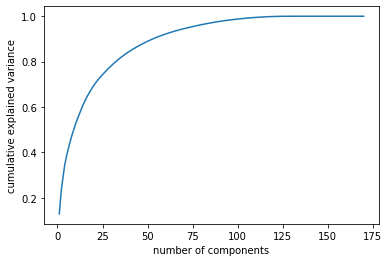

In [75]:
#scree plot

variance_cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.plot(range(1,len(variance_cumulative_sum)+1), variance_cumulative_sum)
plt.show()

In [76]:
# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0                    12.85
1                    22.44
2                    28.69
3                    34.32
4                    38.24
5                    41.60
6                    44.68
7                    47.50
8                    49.97
9                    52.39
10                   54.59
11                   56.64
12                   58.60
13                   60.55
14                   62.31
15                   63.96
16                   65.38
17                   66.76
18                   68.06
19                   69.31
20                   70.46
21                   71.49
22                   72.46
23                   73.39
24                   74.27
25                   75.12
26                   75.96
27                   76.77
28                   77.54
29                   78.29
30                   79.03
31                   79.73
32                   80.42
33                   81.08
34                   81.72
35                   82.33
36                   82.92
3

> `Observation`: We can explain around 95% of variance using 75 columns

In [79]:
#Let's run PCA with 75 components this time

pca_75 = PCA(n_components = 75)

pca_75.fit(X_train_balanced)

PCA(n_components=75)

In [81]:
X_train_pca = pca_75.fit_transform(X_train_balanced)
print(X_train_pca.shape)

X_test_pca = pca_75.transform(X_test)
print(X_test_pca.shape)

(39028, 75)
(9003, 75)


In [82]:
col = list(telecom_pca.columns)
df_pca = pd.DataFrame({'PC-1':pca_75.components_[0],'PC-2':pca_75.components_[1], 'PC-3':pca_75.components_[2],'Feature':col})
df_pca.head(10)

,PC-1,PC-2,PC-3,Feature
0,0.01,0.02,-0.04,mobile_number
1,0.01,0.14,0.06,arpu_6
2,0.03,0.19,0.06,arpu_7
3,0.05,0.18,0.01,arpu_8
4,-0.08,0.09,0.10,onnet_mou_6
5,-0.07,0.11,0.10,onnet_mou_7
6,-0.03,0.11,0.06,onnet_mou_8
7,-0.08,0.14,0.09,offnet_mou_6
8,-0.06,0.17,0.08,offnet_mou_7
9,-0.01,0.14,0.02,offnet_mou_8


### Logistic Regression with PCA

In [90]:
lr_pca = LogisticRegression()

lr_pca.fit(X_train_pca, y_train_balanced)

# make the predictions
y_pred_lr = lr_pca.predict(X_test_pca)

# convert prediction array into a dataframe
y_pred_df = pd.DataFrame(y_pred_lr)

In [97]:
print_model_metrics(y_test, y_pred_lr, 'Logistic Regression with 75 PCs')

------ 

### Logistic Regression with 75 PCs Model Stats Scores Summary : 

,Model,Accuracy,Precision,Recall,AUC,F1
0,Logistic Regression with 75 PCs,0.83,0.85,0.27,0.84,0.42


### XGBoost with PCA

In [136]:
#Let us now use XGBoost to see if we can obtain a more stable model

X_train_pca, X_test_pca, y_train, y_test = resampling_data(X, y, 75)

Shape of train datatset before : (21005, 170)

Percenatge of Churned customer data : 7.04

Applying SMOTE to normalize imbalance.....

Shape of train datatset after SMOTE : (39028, 170)

Shape of train datatset after PCA : (39028, 75)


In [137]:
# fit model on training data with default hyperparameters

model_xgb = XGBClassifier()
model_xgb.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [138]:
# evaluate predictions and see model accuracy

y_pred_xgb_default = model_xgb.predict(X_test_pca)

print_model_metrics(y_test, y_pred_xgb_default, "XGBoost (Default)")

------ 

### XGBoost (Default) Model Stats Scores Summary : 

,Model,Accuracy,Precision,Recall,AUC,F1
0,XGBoost (Default),0.92,0.61,0.44,0.78,0.51


In [139]:
# Let us now tune the hyperparameters here to see if we can improve our model

# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5]}          


# specify model
model_xgb = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model_xgb, 
                        param_grid = param_grid, 
                        scoring= 'accuracy',
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)      

In [140]:
# fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.9min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [141]:
# cv results
cv_results_xgboost = pd.DataFrame(model_cv.cv_results_)
cv_results_xgboost['param_learning_rate'] = cv_results_xgboost['param_learning_rate'].astype('float')

In [142]:
print('Max possible accuracy with XGBoost is '+str(round(model_cv.best_score_,2))+' using '+str(model_cv.best_params_))

Max possible accuracy with XGBoost is 0.89 using {'learning_rate': 0.3, 'subsample': 0.4}


In [145]:
# Building the model with the chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc

model_params = {'learning_rate': 0.3,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.5,
         'objective':'binary:logistic'}

# fit model on training data
tunedxgb_model = XGBClassifier(params = model_params, max_depth=2, n_estimators=200)
tunedxgb_model.fit(X_train_pca, y_train)

[21:21:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.5},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [146]:
prediction_xgbTuned = tunedxgb_model.predict(X_test_pca)

print_model_metrics(y_test, prediction_xgbTuned, "XGBoost (Optimized)")

------ 

### XGBoost (Optimized) Model Stats Scores Summary : 

,Model,Accuracy,Precision,Recall,AUC,F1
0,XGBoost (Optimized),0.87,0.80,0.33,0.84,0.47


### Random Forest with PCA

In [106]:
#Let us see how RF holds against the churn prediction

X_train_pca, X_test_pca, y_train, y_test = resampling_data(X,y,75)

Shape of train datatset before : (21005, 170)

Percenatge of Churned customer data : 7.04

Applying SMOTE to normalize imbalance.....

Shape of train datatset after SMOTE : (39028, 170)

Shape of train datatset after PCA : (39028, 75)


In [107]:
#Fit the model

rfc = RandomForestClassifier()
rfc.fit(X_train_pca, y_train)

RandomForestClassifier()

In [109]:
#Making the predictions

predictions_rf_default = rfc.predict(X_test_pca)

In [110]:
print_model_metrics(y_test, predictions_rf_default, "RandomForest (Default)")

------ 

### RandomForest (Default) Model Stats Scores Summary : 

,Model,Accuracy,Precision,Recall,AUC,F1
0,RandomForest (Default),0.93,0.51,0.48,0.73,0.49


> The model produces a 93% accuracy by default, let's tune some hyperparamters to see if we can make this better

In [127]:
#Defining a utility API for hyperparamter tuning

def tune_modelhyperparamters(parameters, X_train, y_train, n_folds = 5):
    rf = RandomForestClassifier()
    rf = GridSearchCV(rf, parameters, cv=n_folds, n_jobs = -1, scoring = "accuracy", return_train_score=True)
    rf.fit(X_train, y_train)
    scores = rf.cv_results_
    
    for key in parameters.keys():
        hyperparams = key
        break
    
    plt.figure(figsize=(15,5))
    plt.plot(scores["param_"+hyperparams], scores["mean_train_score"], label="Training Accuracy")
    plt.plot(scores["param_"+hyperparams], scores["mean_test_score"], label="Test Accuracy")
    plt.xlabel(hyperparams)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

#### Tuning max_depth

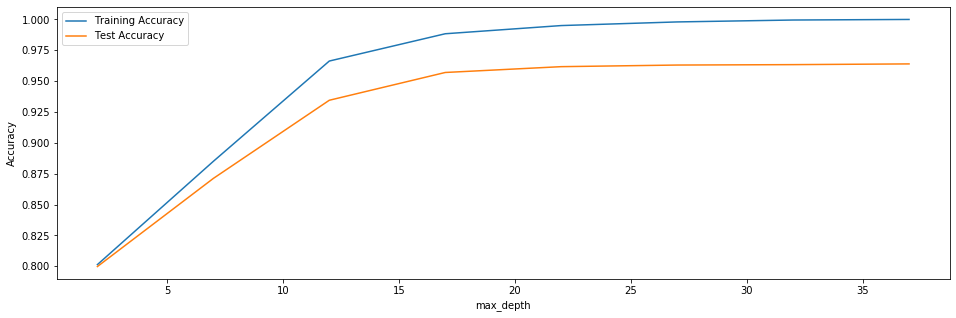

In [119]:
# parameters to build the model on

parameters = {'max_depth': range(2, 40, 5)}
tune_modelhyperparamters(parameters,X_train_pca,y_train)

> `Observation:` Optimal value for max_depth is somewhere betwwen 12 and 18 after which we can see the model tends to overfit on the training data and the accuracy for test remains near stagnant

#### Tuning max_features

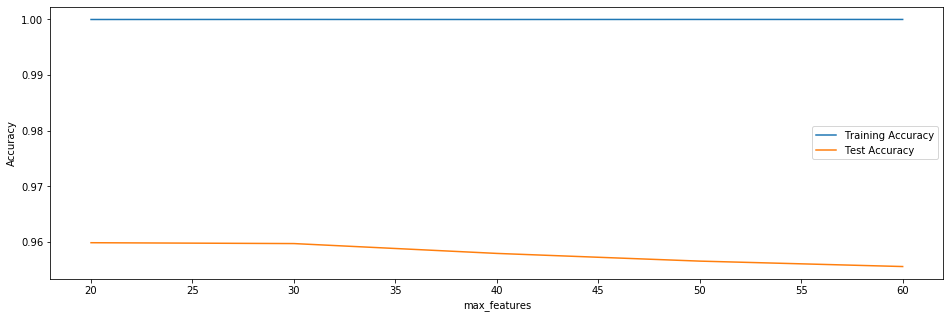

In [121]:
# parameters to build the model on

parameters = {'max_features': [20,30,40,50,60]}
tune_modelhyperparamters(parameters, X_train_pca, y_train, 4)

> `Observation:`Training accuracy is nearly stagnant but for the Test Accuracy we see a rise in the accuracy till nearly 40 features after which the accuracy starts decreasing

#### Tuning min_samples_leaf

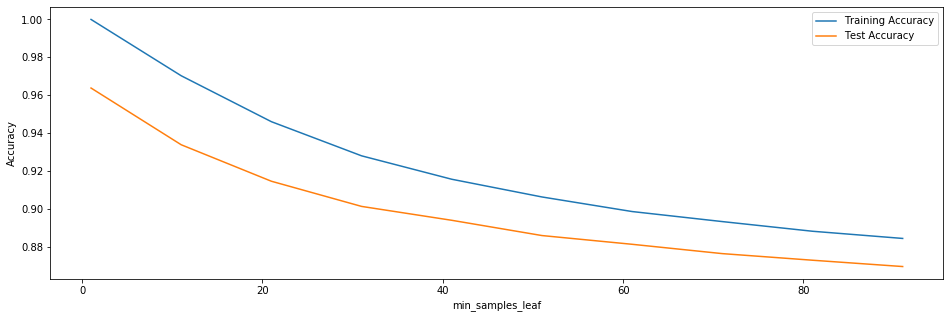

In [122]:
# parameters to build the model on

parameters = {'min_samples_leaf': range(1, 100, 10)}
tune_modelhyperparamters(parameters, X_train_pca, y_train)

> `Observation:`Model accuracy starts to decrease as we increase the min_sample_leaf, so based on the graph above, 10-15 is a good range for this hyperparameter

#### Tuning min_samples_split

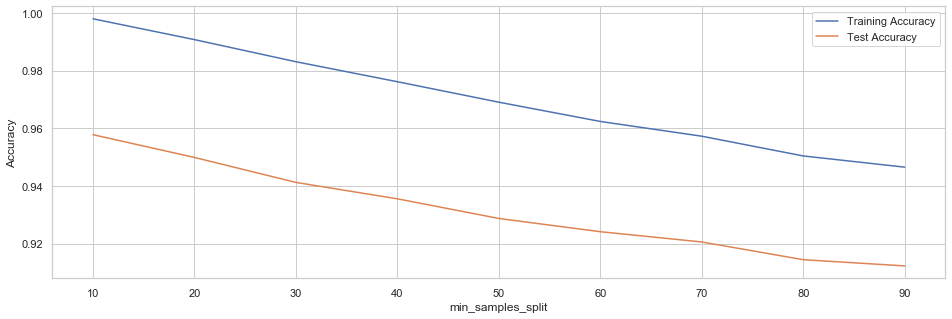

In [124]:
# parameters to build the model on

parameters = {'min_samples_split': range(10, 100, 10)}
tune_modelhyperparamters(parameters, X_train_pca, y_train, 4)

> `Observation:`After 30, we see a gradual drop in the accuracy both for train and test. So, our optimal value range is between 10 and 30

#### Tuning n_estimators

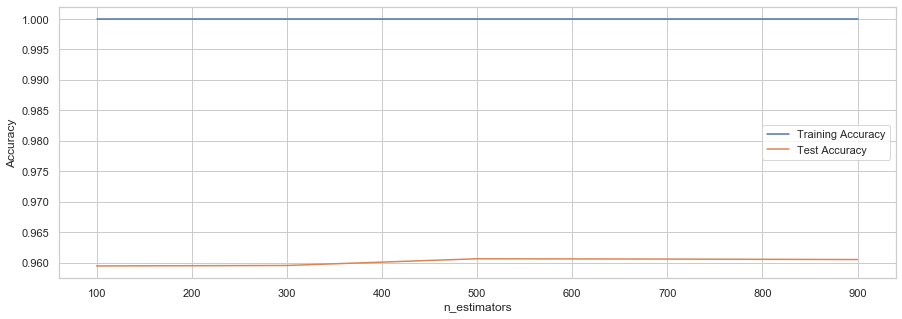

In [128]:
# parameters to build the model on

parameters = {'n_estimators': range(100, 1000, 200)}
tune_modelhyperparamters(parameters, X_train_pca, y_train, 3)

> `Observation:` Training accuracy is again pretty stagnant throughout but we see a small spike in accuracy around 500 estimators for the test data

#### Now that we have the optimal values for all hyperparameters, let us use them for the final model

In [129]:
# Create the parameter grid based on the previously obtained results

param_grid = {
    'max_depth': [12,18],
    'n_estimators': [500],
    'max_features': [40],
    'min_samples_leaf': [10,15],
    'min_samples_split': [10,20,30]
}

# Create a basis model
rf = RandomForestClassifier()

# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,return_train_score=True)

In [130]:
# Fit the data

rf_grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 67.0min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [12, 18], 'max_features': [40],
                         'min_samples_leaf': [10, 15],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [500]},
             return_train_score=True, verbose=1)

In [132]:
print('Max possible accuracy with Random Forest classifier is '+str(round(rf_grid_search.best_score_,2))+' using '+str(rf_grid_search.best_params_))

Max possible accuracy with Random Forest classifier is 0.94 using {'max_depth': 18, 'max_features': 40, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 500}


In [133]:
#Building the final RandomForest model

rfc_tuned = RandomForestClassifier(max_depth=18,
                             max_features=40,
                             min_samples_leaf=10,
                             min_samples_split=20,
                             n_estimators=500,
                             n_jobs = -1)
rfc_tuned.fit(X_train_pca,y_train)

RandomForestClassifier(max_depth=18, max_features=40, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=500, n_jobs=-1)

In [134]:
# Making predictions

predictions_rfc_optimized = rfc_tuned.predict(X_test_pca)

In [135]:
print_model_metrics(y_test, predictions_rfc_optimized, "RandomForest (Optimized)")

------ 

### RandomForest (Optimized) Model Stats Scores Summary : 

,Model,Accuracy,Precision,Recall,AUC,F1
0,RandomForest (Optimized),0.92,0.68,0.43,0.81,0.53


------ 

### Feature Importance:

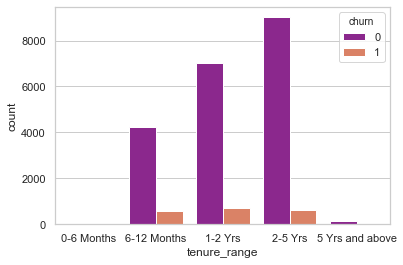

In [162]:
# plotting
header("Feature Importance:")

plt.figure(figsize=(6,4))
sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure_data,palette=("plasma"))
plt.show()

In [154]:
imp_cols = list(X.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':imp_cols})
df_pca.head(15)

,PC1,PC2,PC3,Feature
0,0.01,0.02,-0.04,mobile_number
1,0.01,0.14,0.06,arpu_6
2,0.03,0.19,0.06,arpu_7
3,0.05,0.18,0.01,arpu_8
4,-0.08,0.09,0.10,onnet_mou_6
5,-0.07,0.11,0.10,onnet_mou_7
6,-0.03,0.11,0.06,onnet_mou_8
7,-0.08,0.14,0.09,offnet_mou_6
8,-0.06,0.17,0.08,offnet_mou_7
9,-0.01,0.14,0.02,offnet_mou_8


### Recommendations

1. Customers with less than 4 years of tenure are more likely to churn and the company should pay special attention to this segment (possibily, rollout lucrative schemes to capture the customer interest)

2. arpu (Average Revenue Per User) is a strong indicator for determining customer churn

3. Minutes of usage (MOU) for Onnet (All kinds of calls within the same operator network) and Offnet (All kinds of calls outside the operator network) calls are also strong indicators of churn. If a customer is not using call facility on the network for some time, there is a good probability that the customer can churn

4. Roaming (incoming and outgoing) are also strong churn indicators and the company should keep an eye out for customers who have not used roaming facilities since some time